<a href="https://colab.research.google.com/github/ikechiamaka/ikechiamaka/blob/main/WeatherPredictions_SNRBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv('weatherdata.csv', index_col = 'dt_iso')
df

,dt,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,,,
1983-01-01 00:00:00 +0000 UTC,410227200,-18000,Ottawa,45.42153,-75.697193,-2.87,NaN,-6.25,-6.78,-3.29,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
1983-01-01 01:00:00 +0000 UTC,410230800,-18000,Ottawa,45.42153,-75.697193,-2.95,NaN,-6.32,-6.86,-3.39,...,NaN,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04n
1983-01-01 02:00:00 +0000 UTC,410234400,-18000,Ottawa,45.42153,-75.697193,-2.83,NaN,-5.75,-6.68,-3.27,...,NaN,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04n
1983-01-01 03:00:00 +0000 UTC,410238000,-18000,Ottawa,45.42153,-75.697193,-2.84,NaN,-5.47,-6.82,-3.29,...,NaN,NaN,NaN,NaN,NaN,97,804,Clouds,overcast clouds,04n
1983-01-01 04:00:00 +0000 UTC,410241600,-18000,Ottawa,45.42153,-75.697193,-2.97,NaN,-5.31,-7.19,-3.41,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18 19:00:00 +0000 UTC,1676746800,-18000,Ottawa,45.42153,-75.697193,-1.29,10000.0,-6.37,-6.61,-2.33,...,NaN,NaN,NaN,NaN,1.00,100,600,Snow,light snow,13d
2023-02-18 20:00:00 +0000 UTC,1676750400,-18000,Ottawa,45.42153,-75.697193,-0.65,10000.0,-5.76,-6.10,-1.57,...,8.75,NaN,NaN,NaN,0.13,100,600,Snow,light snow,13d
2023-02-18 21:00:00 +0000 UTC,1676754000,-18000,Ottawa,45.42153,-75.697193,-0.67,10000.0,-5.08,-6.63,-1.22,...,NaN,NaN,NaN,NaN,0.13,100,600,Snow,light snow,13d


In [19]:
df.apply(pd.isnull).sum()

dt                          0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility              23305
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              372004
grnd_level             372004
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              317978
rain_1h                326022
rain_3h                371770
snow_1h                350327
snow_3h                371854
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [20]:
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
null_pct

dt                     0.000000
timezone               0.000000
city_name              0.000000
lat                    0.000000
lon                    0.000000
temp                   0.000000
visibility             0.062647
dew_point              0.000000
feels_like             0.000000
temp_min               0.000000
temp_max               0.000000
pressure               0.000000
sea_level              1.000000
grnd_level             1.000000
humidity               0.000000
wind_speed             0.000000
wind_deg               0.000000
wind_gust              0.854770
rain_1h                0.876394
rain_3h                0.999371
snow_1h                0.941729
snow_3h                0.999597
clouds_all             0.000000
weather_id             0.000000
weather_main           0.000000
weather_description    0.000000
weather_icon           0.000000
dtype: float64

In [21]:
valid_columns = df.columns[null_pct<.05]
valid_columns

Index(['dt', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'dew_point',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')

In [22]:
df = df[valid_columns].copy()
df

,dt,timezone,city_name,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,
1983-01-01 00:00:00 +0000 UTC,410227200,-18000,Ottawa,45.42153,-75.697193,-2.87,-6.25,-6.78,-3.29,-2.50,1021,75,2.83,185,100,804,Clouds,overcast clouds,04n
1983-01-01 01:00:00 +0000 UTC,410230800,-18000,Ottawa,45.42153,-75.697193,-2.95,-6.32,-6.86,-3.39,-2.57,1021,75,2.82,192,99,804,Clouds,overcast clouds,04n
1983-01-01 02:00:00 +0000 UTC,410234400,-18000,Ottawa,45.42153,-75.697193,-2.83,-5.75,-6.68,-3.27,-2.44,1020,78,2.78,205,99,804,Clouds,overcast clouds,04n
1983-01-01 03:00:00 +0000 UTC,410238000,-18000,Ottawa,45.42153,-75.697193,-2.84,-5.47,-6.82,-3.29,-2.43,1019,80,2.91,214,97,804,Clouds,overcast clouds,04n
1983-01-01 04:00:00 +0000 UTC,410241600,-18000,Ottawa,45.42153,-75.697193,-2.97,-5.31,-7.19,-3.41,-2.58,1019,82,3.13,221,76,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18 19:00:00 +0000 UTC,1676746800,-18000,Ottawa,45.42153,-75.697193,-1.29,-6.37,-6.61,-2.33,-0.16,1018,65,5.14,210,100,600,Snow,light snow,13d
2023-02-18 20:00:00 +0000 UTC,1676750400,-18000,Ottawa,45.42153,-75.697193,-0.65,-5.76,-6.10,-1.57,0.02,1018,65,5.66,230,100,600,Snow,light snow,13d
2023-02-18 21:00:00 +0000 UTC,1676754000,-18000,Ottawa,45.42153,-75.697193,-0.67,-5.08,-6.63,-1.22,-0.04,1019,69,6.69,240,100,600,Snow,light snow,13d


In [23]:
df.apply(pd.isnull).sum()

dt                     0
timezone               0
city_name              0
lat                    0
lon                    0
temp                   0
dew_point              0
feels_like             0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [24]:
df.dtypes

dt                       int64
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed             float64
wind_deg                 int64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [25]:
df.index

Index(['1983-01-01 00:00:00 +0000 UTC', '1983-01-01 01:00:00 +0000 UTC',
       '1983-01-01 02:00:00 +0000 UTC', '1983-01-01 03:00:00 +0000 UTC',
       '1983-01-01 04:00:00 +0000 UTC', '1983-01-01 05:00:00 +0000 UTC',
       '1983-01-01 06:00:00 +0000 UTC', '1983-01-01 07:00:00 +0000 UTC',
       '1983-01-01 08:00:00 +0000 UTC', '1983-01-01 09:00:00 +0000 UTC',
       ...
       '2023-02-18 14:00:00 +0000 UTC', '2023-02-18 15:00:00 +0000 UTC',
       '2023-02-18 16:00:00 +0000 UTC', '2023-02-18 17:00:00 +0000 UTC',
       '2023-02-18 18:00:00 +0000 UTC', '2023-02-18 19:00:00 +0000 UTC',
       '2023-02-18 20:00:00 +0000 UTC', '2023-02-18 21:00:00 +0000 UTC',
       '2023-02-18 22:00:00 +0000 UTC', '2023-02-18 23:00:00 +0000 UTC'],
      dtype='object', name='dt_iso', length=372004)

In [26]:
from dateutil import parser
import pandas as pd
df.index = df.index.str.replace(' UTC', '')
# Parse the index column using dateutil.parser.parse()
df.index = df.index.map(lambda x: parser.parse(x))

# Verify that the index is now a DatetimeIndex
print(df.index)


DatetimeIndex(['1983-01-01 00:00:00+00:00', '1983-01-01 01:00:00+00:00',
               '1983-01-01 02:00:00+00:00', '1983-01-01 03:00:00+00:00',
               '1983-01-01 04:00:00+00:00', '1983-01-01 05:00:00+00:00',
               '1983-01-01 06:00:00+00:00', '1983-01-01 07:00:00+00:00',
               '1983-01-01 08:00:00+00:00', '1983-01-01 09:00:00+00:00',
               ...
               '2023-02-18 14:00:00+00:00', '2023-02-18 15:00:00+00:00',
               '2023-02-18 16:00:00+00:00', '2023-02-18 17:00:00+00:00',
               '2023-02-18 18:00:00+00:00', '2023-02-18 19:00:00+00:00',
               '2023-02-18 20:00:00+00:00', '2023-02-18 21:00:00+00:00',
               '2023-02-18 22:00:00+00:00', '2023-02-18 23:00:00+00:00'],
              dtype='datetime64[ns, tzlocal()]', name='dt_iso', length=372004, freq=None)


In [27]:
df.index = pd.to_datetime(df.index, format='%d-%m-%Y %H:%M:%S')
df[:26]

,dt,timezone,city_name,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,,,,
1983-01-01 00:00:00+00:00,410227200,-18000,Ottawa,45.42153,-75.697193,-2.87,-6.25,-6.78,-3.29,-2.50,1021,75,2.83,185,100,804,Clouds,overcast clouds,04n
1983-01-01 01:00:00+00:00,410230800,-18000,Ottawa,45.42153,-75.697193,-2.95,-6.32,-6.86,-3.39,-2.57,1021,75,2.82,192,99,804,Clouds,overcast clouds,04n
1983-01-01 02:00:00+00:00,410234400,-18000,Ottawa,45.42153,-75.697193,-2.83,-5.75,-6.68,-3.27,-2.44,1020,78,2.78,205,99,804,Clouds,overcast clouds,04n
1983-01-01 03:00:00+00:00,410238000,-18000,Ottawa,45.42153,-75.697193,-2.84,-5.47,-6.82,-3.29,-2.43,1019,80,2.91,214,97,804,Clouds,overcast clouds,04n
1983-01-01 04:00:00+00:00,410241600,-18000,Ottawa,45.42153,-75.697193,-2.97,-5.31,-7.19,-3.41,-2.58,1019,82,3.13,221,76,803,Clouds,broken clouds,04n
1983-01-01 05:00:00+00:00,410245200,-18000,Ottawa,45.42153,-75.697193,-2.95,-5.15,-7.34,-3.51,-2.42,1018,83,3.32,223,45,802,Clouds,scattered clouds,03n
1983-01-01 06:00:00+00:00,410248800,-18000,Ottawa,45.42153,-75.697193,-2.96,-5.16,-7.55,-3.55,-2.42,1018,83,3.54,226,8,800,Clear,sky is clear,01n
1983-01-01 07:00:00+00:00,410252400,-18000,Ottawa,45.42153,-75.697193,-3.07,-5.40,-7.70,-3.69,-2.51,1018,82,3.56,226,1,800,Clear,sky is clear,01n
1983-01-01 08:00:00+00:00,410256000,-18000,Ottawa,45.42153,-75.697193,-3.02,-5.36,-7.65,-3.64,-2.46,1017,82,3.57,225,0,800,Clear,sky is clear,01n


In [28]:
df.to_csv('cleaned_weather_data.csv', index=True)

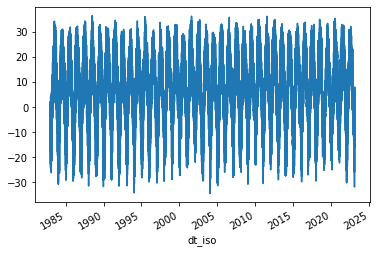

In [29]:
temp = df['temp']
temp.plot()

In [30]:

        # X                    y
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [31]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((371999, 5, 1), (371999,))

In [36]:
X_train1, y_train1 = X1[:300000], y1[:300000]
X_val1, y_val1 = X1[300000:360000], y1[300000:360000]
X_test1, y_test1 = X1[360000:], y1[360000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((300000, 5, 1), (300000,), (60000, 5, 1), (60000,), (11999, 5, 1), (11999,))

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [38]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [39]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
9368/9375 [============================>.] - ETA: 0s - loss: 11.2421 - root_mean_squared_error: 3.3529

9375/9375 [==============================] - 55s 6ms/step - loss: 11.2350 - root_mean_squared_error: 3.3519 - val_loss: 0.7202 - val_root_mean_squared_error: 0.8487
Epoch 2/10
9364/9375 [============================>.] - ETA: 0s - loss: 1.3882 - root_mean_squared_error: 1.1782

9375/9375 [==============================] - 50s 5ms/step - loss: 1.3880 - root_mean_squared_error: 1.1781 - val_loss: 0.6802 - val_root_mean_squared_error: 0.8247
Epoch 3/10
9369/9375 [============================>.] - ETA: 0s - loss: 1.3641 - root_mean_squared_error: 1.1680

9375/9375 [==============================] - 50s 5ms/step - loss: 1.3642 - root_mean_squared_error: 1.1680 - val_loss: 0.6684 - val_root_mean_squared_error: 0.8176
Epoch 4/10
9375/9375 [==============================] - 47s 5ms/step - loss: 1.3539 - root_mean_squared_error: 1.1636 - val_loss: 0.6723 - val_root_mean_squared_error: 0.8199
Epoch 5/10
9374/9375 [============================>.] - ETA: 0s - loss: 1.3470 - root_mean_squared_error: 1.1606

9375/9375 [==============================] - 50s 5ms/step - loss: 1.3470 - root_mean_squared_error: 1.1606 - val_loss: 0.6556 - val_root_mean_squared_error: 0.8097
Epoch 6/10
9373/9375 [============================>.] - ETA: 0s - loss: 1.3420 - root_mean_squared_error: 1.1584

9375/9375 [==============================] - 52s 6ms/step - loss: 1.3420 - root_mean_squared_error: 1.1585 - val_loss: 0.6511 - val_root_mean_squared_error: 0.8069
Epoch 7/10
9375/9375 [==============================] - 47s 5ms/step - loss: 1.3379 - root_mean_squared_error: 1.1567 - val_loss: 0.6544 - val_root_mean_squared_error: 0.8090
Epoch 8/10
9375/9375 [==============================] - ETA: 0s - loss: 1.3335 - root_mean_squared_error: 1.1548

9375/9375 [==============================] - 49s 5ms/step - loss: 1.3335 - root_mean_squared_error: 1.1548 - val_loss: 0.6511 - val_root_mean_squared_error: 0.8069
Epoch 9/10
9375/9375 [==============================] - 44s 5ms/step - loss: 1.3310 - root_mean_squared_error: 1.1537 - val_loss: 0.7122 - val_root_mean_squared_error: 0.8439
Epoch 10/10
9375/9375 [==============================] - 46s 5ms/step - loss: 1.3281 - root_mean_squared_error: 1.1524 - val_loss: 0.6563 - val_root_mean_squared_error: 0.8101


In [40]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [41]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

9375/9375 [==============================] - 24s 2ms/step


,Train Predictions,Actuals
0,-3.102844,-2.95
1,-3.051992,-2.96
2,-3.054648,-3.07
3,-3.204453,-3.02
4,-3.108242,-3.07
...,...,...
299995,18.527664,17.09
299996,16.918581,18.02
299997,18.419174,16.99
299998,16.559370,14.81


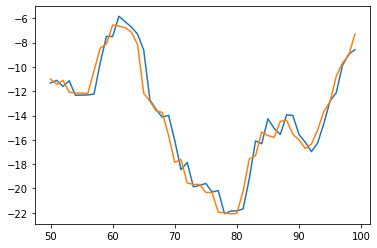

In [42]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [43]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1875/1875 [==============================] - 5s 3ms/step


,Val Predictions,Actuals
0,12.257876,11.98
1,11.366664,10.80
2,10.257457,9.57
3,9.014678,8.69
4,8.180037,8.33
...,...,...
59995,9.253215,8.48
59996,7.848091,8.96
59997,8.625769,8.46
59998,8.072277,7.51


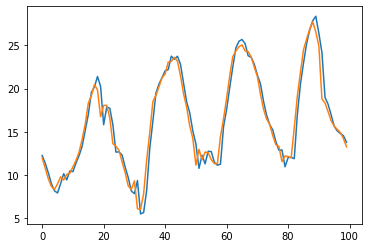

In [44]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [45]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

375/375 [==============================] - 1s 2ms/step


,Test Predictions,Actuals
0,6.954975,6.59
1,6.266168,6.96
2,6.940404,6.58
3,6.386396,7.04
4,7.175116,7.01
...,...,...
11994,-1.238029,-1.29
11995,-0.996129,-0.65
11996,-0.288265,-0.67
11997,-0.556898,-1.03


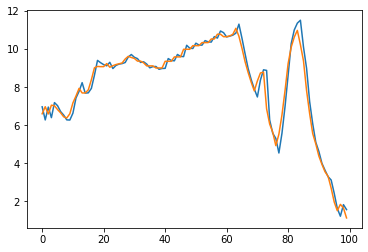

In [46]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
# Part 2

In [47]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

375/375 [==============================] - 1s 2ms/step


(       Predictions  Actuals
 0         6.954975     6.59
 1         6.266168     6.96
 2         6.940404     6.58
 3         6.386396     7.04
 4         7.175116     7.01
 ...            ...      ...
 11994    -1.238029    -1.29
 11995    -0.996129    -0.65
 11996    -0.288265    -0.67
 11997    -0.556898    -1.03
 11998    -1.208329    -1.04
 
 [11999 rows x 2 columns], 0.58397101887506)

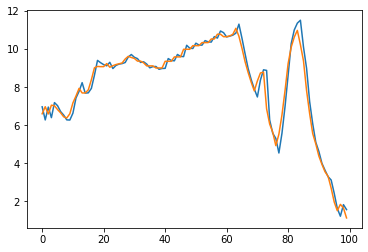

In [48]:
plot_predictions1(model1, X_test1, y_test1)

In [49]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 2056      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [50]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [51]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
9360/9375 [============================>.] - ETA: 0s - loss: 4.0095 - root_mean_squared_error: 2.0024

9375/9375 [==============================] - 40s 4ms/step - loss: 4.0051 - root_mean_squared_error: 2.0013 - val_loss: 0.7374 - val_root_mean_squared_error: 0.8587
Epoch 2/10
9363/9375 [============================>.] - ETA: 0s - loss: 1.3933 - root_mean_squared_error: 1.1804

9375/9375 [==============================] - 36s 4ms/step - loss: 1.3934 - root_mean_squared_error: 1.1804 - val_loss: 0.7076 - val_root_mean_squared_error: 0.8412
Epoch 3/10
9360/9375 [============================>.] - ETA: 0s - loss: 1.3865 - root_mean_squared_error: 1.1775

9375/9375 [==============================] - 36s 4ms/step - loss: 1.3867 - root_mean_squared_error: 1.1776 - val_loss: 0.6903 - val_root_mean_squared_error: 0.8308
Epoch 4/10
9375/9375 [==============================] - 35s 4ms/step - loss: 1.3840 - root_mean_squared_error: 1.1764 - val_loss: 0.7121 - val_root_mean_squared_error: 0.8439
Epoch 5/10
9375/9375 [==============================] - 36s 4ms/step - loss: 1.3814 - root_mean_squared_error: 1.1753 - val_loss: 0.7064 - val_root_mean_squared_error: 0.8405
Epoch 6/10
9375/9375 [==============================] - 34s 4ms/step - loss: 1.3776 - root_mean_squared_error: 1.1737 - val_loss: 0.7382 - val_root_mean_squared_error: 0.8592
Epoch 7/10
9375/9375 [==============================] - 36s 4ms/step - loss: 1.3755 - root_mean_squared_error: 1.1728 - val_loss: 0.7226 - val_root_mean_squared_error: 0.8501
Epoch 8/10
9375/9375 [==============================] - ETA: 0s - loss: 1.3727 - root_mean_squared_error: 1.1716

9375/9375 [==============================] - 37s 4ms/step - loss: 1.3727 - root_mean_squared_error: 1.1716 - val_loss: 0.6809 - val_root_mean_squared_error: 0.8252
Epoch 9/10
9375/9375 [==============================] - 35s 4ms/step - loss: 1.3688 - root_mean_squared_error: 1.1700 - val_loss: 0.6810 - val_root_mean_squared_error: 0.8252
Epoch 10/10
9373/9375 [============================>.] - ETA: 0s - loss: 1.3656 - root_mean_squared_error: 1.1686

9375/9375 [==============================] - 34s 4ms/step - loss: 1.3655 - root_mean_squared_error: 1.1685 - val_loss: 0.6726 - val_root_mean_squared_error: 0.8201


In [52]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [53]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [54]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
9367/9375 [============================>.] - ETA: 0s - loss: 11.1215 - root_mean_squared_error: 3.3349

9375/9375 [==============================] - 50s 5ms/step - loss: 11.1127 - root_mean_squared_error: 3.3336 - val_loss: 0.6986 - val_root_mean_squared_error: 0.8358
Epoch 2/10
9368/9375 [============================>.] - ETA: 0s - loss: 1.3852 - root_mean_squared_error: 1.1769

9375/9375 [==============================] - 49s 5ms/step - loss: 1.3851 - root_mean_squared_error: 1.1769 - val_loss: 0.6832 - val_root_mean_squared_error: 0.8265
Epoch 3/10
9372/9375 [============================>.] - ETA: 0s - loss: 1.3646 - root_mean_squared_error: 1.1681

9375/9375 [==============================] - 48s 5ms/step - loss: 1.3646 - root_mean_squared_error: 1.1681 - val_loss: 0.6592 - val_root_mean_squared_error: 0.8119
Epoch 4/10
9375/9375 [==============================] - 43s 5ms/step - loss: 1.3543 - root_mean_squared_error: 1.1637 - val_loss: 0.6771 - val_root_mean_squared_error: 0.8229
Epoch 5/10
9375/9375 [==============================] - ETA: 0s - loss: 1.3490 - root_mean_squared_error: 1.1615

9375/9375 [==============================] - 47s 5ms/step - loss: 1.3490 - root_mean_squared_error: 1.1615 - val_loss: 0.6542 - val_root_mean_squared_error: 0.8089
Epoch 6/10
9375/9375 [==============================] - 44s 5ms/step - loss: 1.3431 - root_mean_squared_error: 1.1589 - val_loss: 0.6584 - val_root_mean_squared_error: 0.8114
Epoch 7/10
9375/9375 [==============================] - 45s 5ms/step - loss: 1.3397 - root_mean_squared_error: 1.1574 - val_loss: 0.6564 - val_root_mean_squared_error: 0.8102
Epoch 8/10
9375/9375 [==============================] - 43s 5ms/step - loss: 1.3365 - root_mean_squared_error: 1.1561 - val_loss: 0.6578 - val_root_mean_squared_error: 0.8110
Epoch 9/10
9375/9375 [==============================] - 44s 5ms/step - loss: 1.3320 - root_mean_squared_error: 1.1541 - val_loss: 0.6693 - val_root_mean_squared_error: 0.8181
Epoch 10/10
9370/9375 [============================>.] - ETA: 0s - loss: 1.3298 - root_mean_squared_error: 1.1532

9375/9375 [==============================] - 48s 5ms/step - loss: 1.3297 - root_mean_squared_error: 1.1531 - val_loss: 0.6390 - val_root_mean_squared_error: 0.7994


In [55]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
dt_iso,,
1983-01-01 00:00:00+00:00,-2.87,4.102272e+08
1983-01-01 01:00:00+00:00,-2.95,4.102308e+08
1983-01-01 02:00:00+00:00,-2.83,4.102344e+08
1983-01-01 03:00:00+00:00,-2.84,4.102380e+08
1983-01-01 04:00:00+00:00,-2.97,4.102416e+08
...,...,...
2023-02-18 19:00:00+00:00,-1.29,1.676747e+09
2023-02-18 20:00:00+00:00,-0.65,1.676750e+09
2023-02-18 21:00:00+00:00,-0.67,1.676754e+09


In [56]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
dt_iso,,,,,,
1983-01-01 00:00:00+00:00,-2.87,410227200.0,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,-2.95,410230800.0,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,-2.83,410234400.0,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,-2.84,410238000.0,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,-2.97,410241600.0,8.660254e-01,0.500000,0.000244,1.000000


In [57]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
dt_iso,,,,,
1983-01-01 00:00:00+00:00,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [58]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [59]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((371998, 6, 5), (371998,))

In [60]:
X2_train, y2_train = X2[:300000], y2[:300000]
X2_val, y2_val = X2[300000:360000], y2[300000:360000]
X2_test, y2_test = X2[360000:], y2[360000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((300000, 6, 5), (300000,), (60000, 6, 5), (60000,), (11998, 6, 5), (11998,))

In [61]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [62]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.55691284e-01, -2.58819045e-01,  9.65925826e-01,
         -8.80910542e-01,  4.73282808e-01],
        [ 1.95273166e-01, -2.97384278e-12,  1.00000000e+00,
         -8.80571075e-01,  4.73914108e-01],
        [ 1.54042039e-01,  2.58819045e-01,  9.65925826e-01,
         -8.80231156e-01,  4.74545164e-01],
        [ 7.57028991e-02,  5.00000000e-01,  8.66025404e-01,
         -8.79890784e-01,  4.75175976e-01],
        [ 5.01396006e-02,  7.07106781e-01,  7.07106781e-01,
         -8.79549960e-01,  4.75806544e-01],
        [-1.62373674e-04,  8.66025404e-01,  5.00000000e-01,
         -8.79208685e-01,  4.76436868e-01]],

       [[ 1.95273166e-01, -2.97384278e-12,  1.00000000e+00,
         -8.80571075e-01,  4.73914108e-01],
        [ 1.54042039e-01,  2.58819045e-01,  9.65925826e-01,
         -8.80231156e-01,  4.74545164e-01],
        [ 7.57028991e-02,  5.00000000e-01,  8.66025404e-01,
         -8.79890784e-01,  4.75175976e-01],
        [ 5.01396006e-02,  7.07106781e-01,  7.07106781e-01,
  

In [63]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17920     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [64]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [65]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
9375/9375 [==============================] - ETA: 0s - loss: 15.3882 - root_mean_squared_error: 3.9228

9375/9375 [==============================] - 53s 5ms/step - loss: 15.3882 - root_mean_squared_error: 3.9228 - val_loss: 1.2787 - val_root_mean_squared_error: 1.1308
Epoch 2/10
9367/9375 [============================>.] - ETA: 0s - loss: 1.5068 - root_mean_squared_error: 1.2275

9375/9375 [==============================] - 52s 6ms/step - loss: 1.5065 - root_mean_squared_error: 1.2274 - val_loss: 0.7331 - val_root_mean_squared_error: 0.8562
Epoch 3/10
9374/9375 [============================>.] - ETA: 0s - loss: 1.1817 - root_mean_squared_error: 1.0870

9375/9375 [==============================] - 51s 5ms/step - loss: 1.1816 - root_mean_squared_error: 1.0870 - val_loss: 0.6047 - val_root_mean_squared_error: 0.7776
Epoch 4/10
9370/9375 [============================>.] - ETA: 0s - loss: 1.1149 - root_mean_squared_error: 1.0559

9375/9375 [==============================] - 51s 5ms/step - loss: 1.1149 - root_mean_squared_error: 1.0559 - val_loss: 0.5879 - val_root_mean_squared_error: 0.7667
Epoch 5/10
9375/9375 [==============================] - 46s 5ms/step - loss: 1.0903 - root_mean_squared_error: 1.0442 - val_loss: 0.6256 - val_root_mean_squared_error: 0.7910
Epoch 6/10
9375/9375 [==============================] - 47s 5ms/step - loss: 1.0619 - root_mean_squared_error: 1.0305 - val_loss: 0.5963 - val_root_mean_squared_error: 0.7722
Epoch 7/10
9375/9375 [==============================] - 47s 5ms/step - loss: 1.0344 - root_mean_squared_error: 1.0170 - val_loss: 0.6241 - val_root_mean_squared_error: 0.7900
Epoch 8/10
9375/9375 [==============================] - 45s 5ms/step - loss: 1.0151 - root_mean_squared_error: 1.0075 - val_loss: 0.6211 - val_root_mean_squared_error: 0.7881
Epoch 9/10
9375/9375 [==============================] - 45s 5ms/step - loss: 1.0024 - root_mean_squared_error: 1.0012 - val_loss: 0.6356

375/375 [==============================] - 1s 2ms/step


(       Predictions  Actuals
 0         6.347387     6.96
 1         6.746503     6.58
 2         6.446210     7.04
 3         6.831361     7.01
 4         6.808343     6.81
 ...            ...      ...
 11993    -0.788343    -1.29
 11994    -0.756346    -0.65
 11995    -0.516208    -0.67
 11996    -1.780875    -1.03
 11997    -1.338720    -1.04
 
 [11998 rows x 2 columns], 0.5742483377967201)

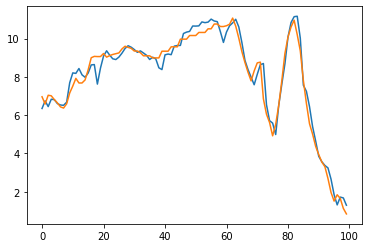

In [66]:
plot_predictions1(model4, X2_test, y2_test)

In [68]:
p_temp_df = pd.concat([df['pressure'], temp_df], axis=1)
p_temp_df.head()

,pressure,Temperature,Day sin,Day cos,Year sin,Year cos
dt_iso,,,,,,
1983-01-01 00:00:00+00:00,1021,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,1021,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,1020,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,1019,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,1019,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [71]:
p_temp_df = pd.concat([df['humidity'], p_temp_df], axis=1)
p_temp_df.head()

,humidity,pressure,Temperature,Day sin,Day cos,Year sin,Year cos
dt_iso,,,,,,,
1983-01-01 00:00:00+00:00,75,1021,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,75,1021,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,78,1020,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,80,1019,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,82,1019,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [85]:
p_temp_df = pd.concat([df['wind_speed'], p_temp_df], axis=1)
p_temp_df.head()

,wind_speed,humidity,pressure,Temperature,Day sin,Day cos,Year sin,Year cos
dt_iso,,,,,,,,
1983-01-01 00:00:00+00:00,2.83,75,1021,-2.87,-3.237709e-12,1.000000,-0.002623,0.999997
1983-01-01 01:00:00+00:00,2.82,75,1021,-2.95,2.588190e-01,0.965926,-0.001907,0.999998
1983-01-01 02:00:00+00:00,2.78,78,1020,-2.83,5.000000e-01,0.866025,-0.001190,0.999999
1983-01-01 03:00:00+00:00,2.91,80,1019,-2.84,7.071068e-01,0.707107,-0.000473,1.000000
1983-01-01 04:00:00+00:00,3.13,82,1019,-2.97,8.660254e-01,0.500000,0.000244,1.000000


In [86]:
def df_to_X_y3(df, window_size=9):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3]]
    y.append(label)
  return np.array(X), np.array(y)

In [87]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((371995, 9, 8), (371995, 4))

In [88]:
X3_train, y3_train = X3[:300000], y3[:300000]
X3_val, y3_val = X3[300000:360000], y3[300000:360000]
X3_test, y3_test = X3[360000:], y3[360000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((300000, 9, 8),
 (300000, 4),
 (60000, 9, 8),
 (60000, 4),
 (11995, 9, 8),
 (11995, 4))

In [89]:
ws_training_mean3 = np.mean(X3_train[:, :, 0])
ws_training_std3 = np.std(X3_train[:, :, 0])

h_training_mean3 = np.mean(X3_train[:, :, 1])
h_training_std3 = np.std(X3_train[:, :, 1])

p_training_mean3 = np.mean(X3_train[:, :, 2])
p_training_std3 = np.std(X3_train[:, :, 2])

temp_training_mean3 = np.mean(X3_train[:, :, 3])
temp_training_std3 = np.std(X3_train[:, :, 3])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - ws_training_mean3) / ws_training_std3
  X[:, :, 1] = (X[:, :, 1] - h_training_mean3) / h_training_std3
  X[:, :, 2] = (X[:, :, 2] - p_training_mean3) / p_training_std3
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - ws_training_mean3) / ws_training_std3
  y[:, 1] = (y[:, 1] - h_training_mean3) / h_training_std3
  y[:, 2] = (y[:, 2] - p_training_mean3) / p_training_std3
  y[:, 3] = (y[:, 3] - temp_training_mean3) / temp_training_std3
  return y

In [90]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [91]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 1.28609604, -0.37098994, -0.81720261,  0.03446505],
       [ 1.05140437, -0.37098994, -0.93332206,  0.01797259],
       [ 0.58653432, -0.26090867, -0.81720261,  0.003954  ],
       ...,
       [ 1.28609604, -0.20586804,  0.46011131, -0.59884546],
       [ 0.82122599,  0.0142945 ,  0.46011131, -0.62853189],
       [ 1.05140437,  0.17941641,  0.69235021, -0.62935651]])

In [95]:
model5 = Sequential()
model5.add(InputLayer((9, 8)))
model5.add(LSTM(64))
model5.add(Dense(9, 'relu'))
model5.add(Dense(4, 'linear'))

model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                18688     
                                                                 
 dense_16 (Dense)            (None, 9)                 585       
                                                                 
 dense_17 (Dense)            (None, 4)                 40        
                                                                 
Total params: 19,313
Trainable params: 19,313
Non-trainable params: 0
_________________________________________________________________


In [96]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [97]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
9375/9375 [==============================] - ETA: 0s - loss: 0.1385 - root_mean_squared_error: 0.3722

9375/9375 [==============================] - 64s 7ms/step - loss: 0.1385 - root_mean_squared_error: 0.3722 - val_loss: 0.0763 - val_root_mean_squared_error: 0.2761
Epoch 2/10
9374/9375 [============================>.] - ETA: 0s - loss: 0.0906 - root_mean_squared_error: 0.3010

9375/9375 [==============================] - 61s 7ms/step - loss: 0.0906 - root_mean_squared_error: 0.3010 - val_loss: 0.0747 - val_root_mean_squared_error: 0.2733
Epoch 3/10
9375/9375 [==============================] - 66s 7ms/step - loss: 0.0895 - root_mean_squared_error: 0.2991 - val_loss: 0.0752 - val_root_mean_squared_error: 0.2742
Epoch 4/10
9367/9375 [============================>.] - ETA: 0s - loss: 0.0889 - root_mean_squared_error: 0.2981

9375/9375 [==============================] - 51s 5ms/step - loss: 0.0889 - root_mean_squared_error: 0.2981 - val_loss: 0.0736 - val_root_mean_squared_error: 0.2713
Epoch 5/10
9375/9375 [==============================] - ETA: 0s - loss: 0.0884 - root_mean_squared_error: 0.2974

9375/9375 [==============================] - 52s 6ms/step - loss: 0.0884 - root_mean_squared_error: 0.2974 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2700
Epoch 6/10
9375/9375 [==============================] - 48s 5ms/step - loss: 0.0881 - root_mean_squared_error: 0.2969 - val_loss: 0.0730 - val_root_mean_squared_error: 0.2701
Epoch 7/10
9364/9375 [============================>.] - ETA: 0s - loss: 0.0879 - root_mean_squared_error: 0.2965

9375/9375 [==============================] - 51s 5ms/step - loss: 0.0879 - root_mean_squared_error: 0.2965 - val_loss: 0.0727 - val_root_mean_squared_error: 0.2696
Epoch 8/10
9373/9375 [============================>.] - ETA: 0s - loss: 0.0877 - root_mean_squared_error: 0.2961

9375/9375 [==============================] - 52s 6ms/step - loss: 0.0877 - root_mean_squared_error: 0.2961 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2694
Epoch 9/10
9375/9375 [==============================] - 48s 5ms/step - loss: 0.0875 - root_mean_squared_error: 0.2958 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2695
Epoch 10/10
9371/9375 [============================>.] - ETA: 0s - loss: 0.0874 - root_mean_squared_error: 0.2956

9375/9375 [==============================] - 51s 5ms/step - loss: 0.0874 - root_mean_squared_error: 0.2956 - val_loss: 0.0721 - val_root_mean_squared_error: 0.2686


In [102]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_predictions2(model, X, y, start=0, end=100, figsize=(12,8)):
    predictions = model.predict(X)
    ws_preds, h_preds, p_preds, temp_preds = predictions[:, 0], predictions[:, 1],  predictions[:, 2], predictions[:, 3]
    ws_actuals, h_actuals, p_actuals, temp_actuals = y[:, 0], y[:, 1], y[:, 2], y[:, 3]
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals':temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals,
                            'Humidity Predictions': h_preds,
                            'Humidity Actuals': h_actuals,
                            'Wind_Speed Predictions': ws_preds,
                            'Wind_Speed Actuals': ws_actuals
                            })
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(df.index[start:end], df['Temperature Predictions'][start:end], color='red', label='Temperature Predictions')
    ax.plot(df.index[start:end], df['Temperature Actuals'][start:end], color='orange', label='Temperature Actuals')
    ax.plot(df.index[start:end], df['Pressure Predictions'][start:end], color='blue', label='Pressure Predictions')
    ax.plot(df.index[start:end], df['Pressure Actuals'][start:end], color='green', label='Pressure Actuals')
    ax.plot(df.index[start:end], df['Humidity Predictions'][start:end], color='purple', label='Humidity Predictions')
    ax.plot(df.index[start:end], df['Humidity Actuals'][start:end], color='pink', label='Humidity Actuals')
    ax.plot(df.index[start:end], df['Wind_Speed Predictions'][start:end], color='brown', label='Wind Speed Predictions')
    ax.plot(df.index[start:end], df['Wind_Speed Actuals'][start:end], color='gray', label='Wind Speed Actuals')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')
    ax.set_title('Weather Variables Predictions vs Actuals')
    return df[start:end]



375/375 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals,Humidity Predictions,Humidity Actuals,Wind_Speed Predictions,Wind_Speed Actuals
0,-0.002171,0.034465,-0.691999,-0.817203,-0.277961,-0.370990,1.042181,1.286096
1,-0.005368,0.017973,-0.802633,-0.933322,-0.243878,-0.370990,1.163182,1.051404
2,-0.018181,0.003954,-0.929089,-0.817203,-0.198919,-0.260909,1.086664,0.586534
3,-0.037788,-0.013363,-0.798733,-0.817203,-0.111883,-0.205868,0.804275,0.821226
4,-0.035422,-0.018311,-0.772591,-0.817203,-0.128911,-0.095787,0.926333,1.051404
...,...,...,...,...,...,...,...,...
95,-0.423903,-0.450413,0.245211,0.227872,1.035054,1.005026,-0.779714,-0.573384
96,-0.443355,-0.474327,0.247792,0.227872,1.019616,1.005026,-0.595061,-0.803563
97,-0.427464,-0.372899,0.241220,0.343992,0.960257,1.060067,-0.648617,-0.573384
98,-0.284011,-0.245907,0.336790,0.343992,0.796149,0.839904,-0.449407,-0.573384


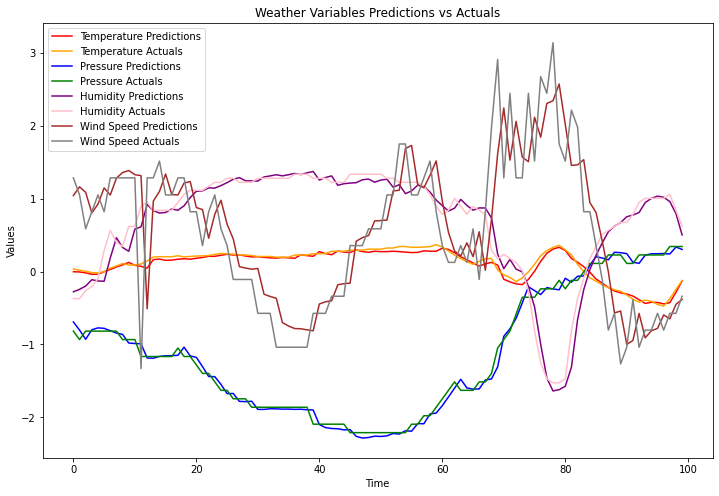

In [103]:
plot_predictions2(model5, X3_test, y3_test)

In [104]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

def postprocess_h(arr):
  arr = (arr*h_training_std3) + h_training_mean3
  return arr

def postprocess_ws(arr):
  arr = (arr*ws_training_std3) + ws_training_mean3
  return arr

In [105]:
def plot_predictions2(model, X, y, start=0, end=100, figsize=(12,8)):
    predictions = model.predict(X)
    ws_preds, h_preds, p_preds, temp_preds = postprocess_ws(predictions[:, 0]), postprocess_h(predictions[:, 1]),  postprocess_p(predictions[:, 2]), postprocess_temp(predictions[:, 3])
    ws_actuals, h_actuals, p_actuals, temp_actuals =postprocess_ws(y[:, 0]), postprocess_h(y[:, 1]), postprocess_p(y[:, 2]), postprocess_temp(y[:, 3])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                            'Temperature Actuals':temp_actuals,
                            'Pressure Predictions': p_preds,
                            'Pressure Actuals': p_actuals,
                            'Humidity Predictions': h_preds,
                            'Humidity Actuals': h_actuals,
                            'Wind_Speed Predictions': ws_preds,
                            'Wind_Speed Actuals': ws_actuals
                            })
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(df.index[start:end], df['Temperature Predictions'][start:end], color='red', label='Temperature Predictions')
    ax.plot(df.index[start:end], df['Temperature Actuals'][start:end], color='orange', label='Temperature Actuals')
    ax.plot(df.index[start:end], df['Pressure Predictions'][start:end], color='blue', label='Pressure Predictions')
    ax.plot(df.index[start:end], df['Pressure Actuals'][start:end], color='green', label='Pressure Actuals')
    ax.plot(df.index[start:end], df['Humidity Predictions'][start:end], color='purple', label='Humidity Predictions')
    ax.plot(df.index[start:end], df['Humidity Actuals'][start:end], color='pink', label='Humidity Actuals')
    ax.plot(df.index[start:end], df['Wind_Speed Predictions'][start:end], color='brown', label='Wind Speed Predictions')
    ax.plot(df.index[start:end], df['Wind_Speed Actuals'][start:end], color='gray', label='Wind Speed Actuals')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Values')
    ax.set_title('Weather Variables Predictions vs Actuals')
    return df[start:end]


375/375 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals,Humidity Predictions,Humidity Actuals,Wind_Speed Predictions,Wind_Speed Actuals
0,6.565723,7.01,1009.078247,1008.0,67.690193,66.0,6.149565,6.69
1,6.526957,6.81,1008.125488,1007.0,68.309418,66.0,6.417664,6.17
2,6.371578,6.64,1007.036438,1008.0,69.126259,68.0,6.248123,5.14
3,6.133802,6.43,1008.159058,1008.0,70.707558,69.0,5.622442,5.66
4,6.162496,6.37,1008.384155,1008.0,70.398186,71.0,5.892883,6.17
...,...,...,...,...,...,...,...,...
95,1.451482,1.13,1017.149292,1017.0,91.545570,91.0,2.112841,2.57
96,1.215598,0.84,1017.171509,1017.0,91.265091,91.0,2.521970,2.06
97,1.408302,2.07,1017.114929,1018.0,90.186615,92.0,2.403307,2.57
98,3.147921,3.61,1017.937988,1018.0,87.205040,88.0,2.844694,2.57


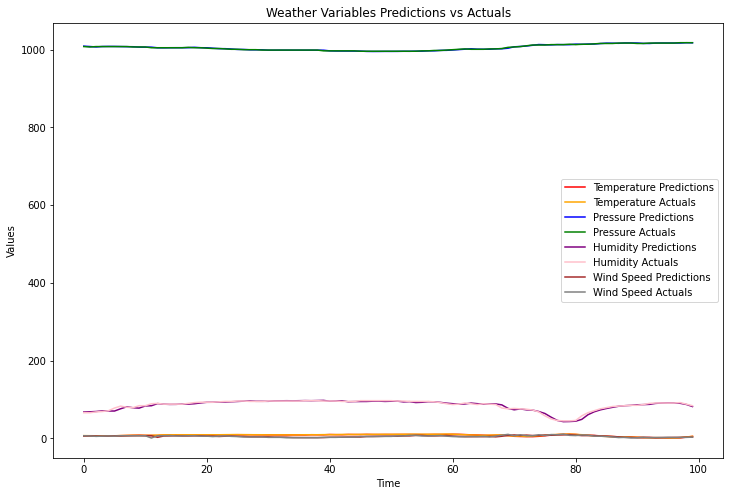

In [111]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

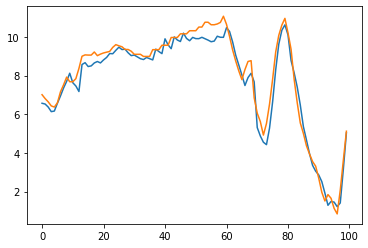

In [107]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

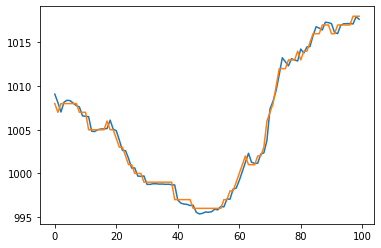

In [108]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

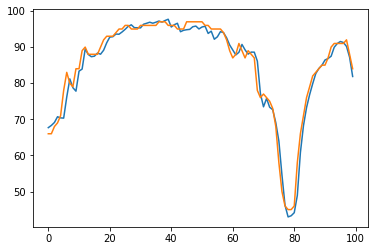

In [109]:
plt.plot(post_processed_df['Humidity Predictions'][start:end])
plt.plot(post_processed_df['Humidity Actuals'][start:end])

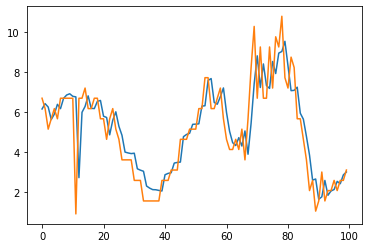

In [110]:
plt.plot(post_processed_df['Wind_Speed Predictions'][start:end])
plt.plot(post_processed_df['Wind_Speed Actuals'][start:end])